# Maze 9x20 - v1

In [1]:
import utils_maze as utils

import numpy as np
import datetime
import matplotlib.pyplot as plt
# import imageio
import os

%matplotlib inline

Using TensorFlow backend.


![SegmentLocal](20190602_2146_gif_9x20v1/seq_movie.gif "segment")

![SegmentLocal](20190602_2158_gif_9x20v2/seq_movie.gif "segment")

In [2]:
rat_mark = 0.5      # The current rat cell will be painteg by gray 0.5
epsilon = 0.1       # Exploration factor

LEFT = 0
UP = 1
RIGHT = 2
DOWN = 3

# Actions dictionary
actions_dict = {
    LEFT: 'left',
    UP: 'up',
    RIGHT: 'right',
    DOWN: 'down',
}
num_actions = len(actions_dict)




maze =  np.array([
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 1.,  1.,  0.,  1.,  1.,  1.,  1.,  1., 1., 1., 1., 1.],  #1
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 1.,  1.,  0.,  1.,  1.,  1.,  1.,  1., 1., 1., 1., 1.],  #2
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 1.,  1.,  0.,  1.,  1.,  1.,  1.,  1., 1., 1., 1., 1.],  #3
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 1.,  1.,  0.,  1.,  1.,  1.,  1.,  1., 1., 1., 1., 1.],  #4
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 1., 1., 1., 1.],  #5
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 1.,  1.,  0.,  1.,  1.,  1.,  1.,  1., 1., 1., 1., 1.],  #6
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 1.,  1.,  0.,  1.,  1.,  1.,  1.,  1., 1., 1., 1., 1.],  #7
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 1.,  1.,  0.,  1.,  1.,  1.,  1.,  1., 1., 1., 1., 1.],  #8
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 1.,  1.,  0.,  1.,  1.,  1.,  1.,  1., 1., 1., 1., 1.]   #9

])

In [9]:
now_str = datetime.datetime.now().strftime('%Y%m%d_%H%M')
folder_name_gif = now_str + '_gif'
folder_name_pngs = folder_name_gif + '/pngs'

utils.create_folder(folder_name_gif)
utils.create_folder(folder_name_pngs)

Successfully created the directory 20190602_2158_gif 
Successfully created the directory 20190602_2158_gif/pngs 


In [4]:
model = utils.build_model(maze, num_actions=num_actions)

# default settings:
# n_epoch=15'000 | max_memory=1000 | data_size=50
utils.qtrain(model=model, maze=maze, n_epoch=1000, max_memory=8*maze.size, data_size=32, rat_mark=rat_mark, epsilon=epsilon)

number of epochs=  1000
Epoch: 000/999 | Loss: 0.1229 | Episodes: 375 | Win count: 1 | Win rate: 0.000 | time: 14.4 seconds
Epoch: 001/999 | Loss: 0.0051 | Episodes: 423 | Win count: 1 | Win rate: 0.000 | time: 29.8 seconds
Epoch: 002/999 | Loss: 0.0138 | Episodes: 61 | Win count: 2 | Win rate: 0.000 | time: 32.1 seconds
Epoch: 003/999 | Loss: 0.0014 | Episodes: 73 | Win count: 3 | Win rate: 0.000 | time: 34.8 seconds
Epoch: 004/999 | Loss: 0.0101 | Episodes: 23 | Win count: 4 | Win rate: 0.000 | time: 35.6 seconds
Epoch: 005/999 | Loss: 0.1085 | Episodes: 172 | Win count: 5 | Win rate: 0.000 | time: 42.0 seconds
Epoch: 006/999 | Loss: 0.0024 | Episodes: 53 | Win count: 6 | Win rate: 0.000 | time: 44.0 seconds
Epoch: 007/999 | Loss: 0.0181 | Episodes: 183 | Win count: 7 | Win rate: 0.000 | time: 50.8 seconds
Epoch: 008/999 | Loss: 0.0267 | Episodes: 83 | Win count: 8 | Win rate: 0.000 | time: 53.9 seconds
Epoch: 009/999 | Loss: 0.0083 | Episodes: 193 | Win count: 9 | Win rate: 0.000 | 

404.006452

In [5]:
# Does the model win for all possible free-cells?
#    (this check is being done inside train-function)
utils.completion_check(model=model, qmaze=utils.Qmaze(maze))

True

True

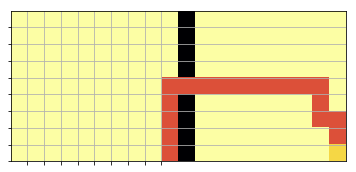

In [10]:
utils.play_game_and_plot(model=model, qmaze=utils.Qmaze(maze), rat_cell=(8,9), folder_name_pngs=folder_name_pngs)

In [11]:
filenames_pngs = os.listdir(folder_name_pngs)
utils.create_gif(folder_name_pngs, folder_name_gif, filenames_pngs)

Finished